### File for viewing events

In [1]:
import sys,os,os.path

# tell python to look for the path to analyse
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import lecroyparser as parse
import numpy as np
import matplotlib.pyplot as plt
from os import walk
from os.path import exists
from os import mkdir
from scipy import stats



from core import processing as proc
from core import plotting as pl
from core import misc as misc


In [2]:
# set yout full path
storage = "/home/e78368jw/Documents/TPB_Project/Wavedump_Wrapper_TPB/storage/"
PATH = storage + "John/testing/RUN000062/PMT/Nominal/"
event_name = "wave_6.dat.root"
output_dir = storage + "John/testing/RUN000062/PMT/"



In [3]:
a = proc.raw_read(event_name, PATH, number = 0)

File found, 2 branches available: ['T;7', 'T;6']
(1/2)


100%|██████████| 1023/1023 [00:00<00:00, 6413.69it/s]


In [4]:
y_vals = a[1]
time = a[0]

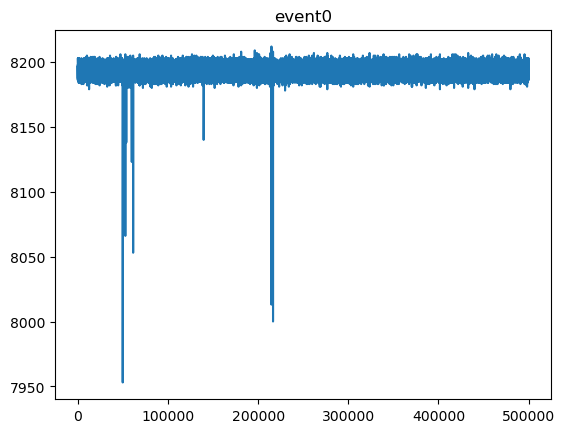

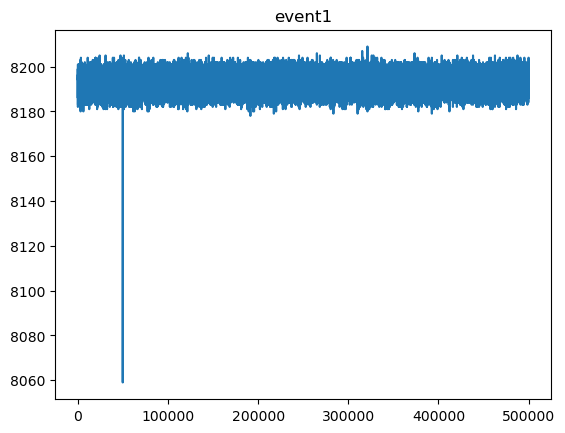

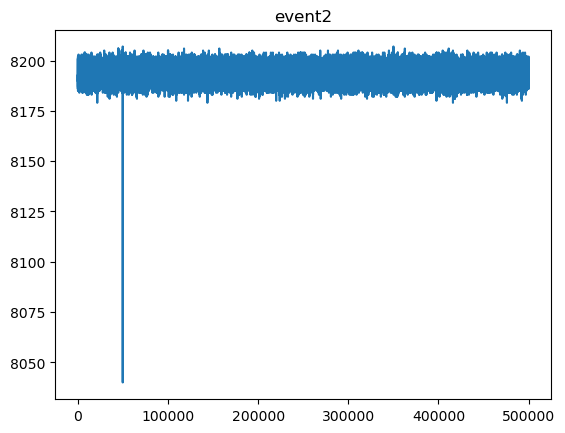

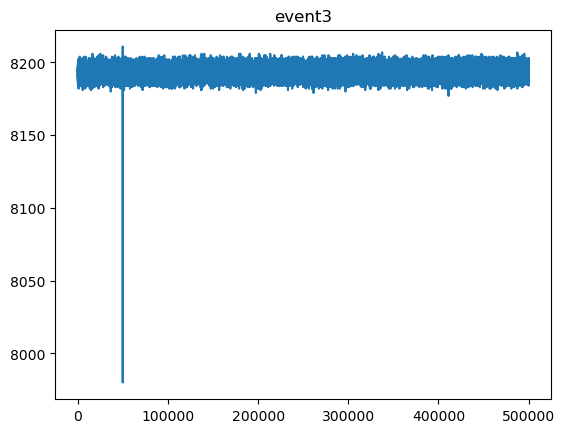

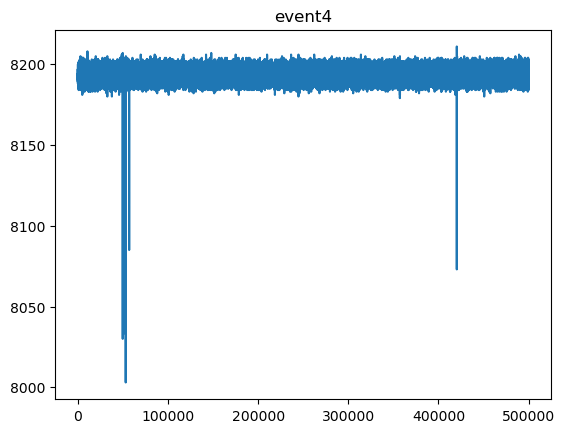

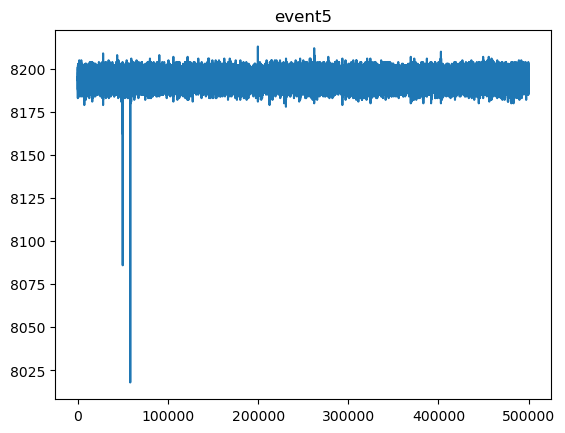

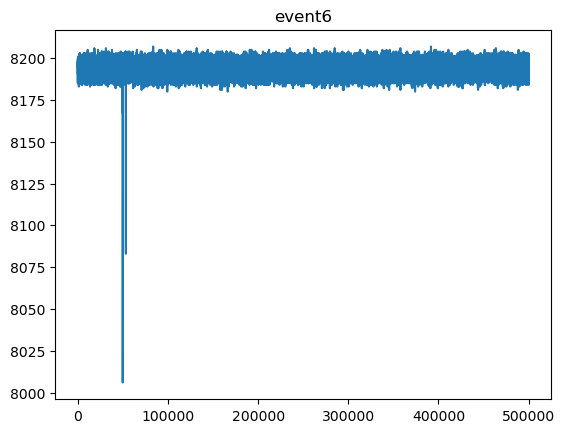

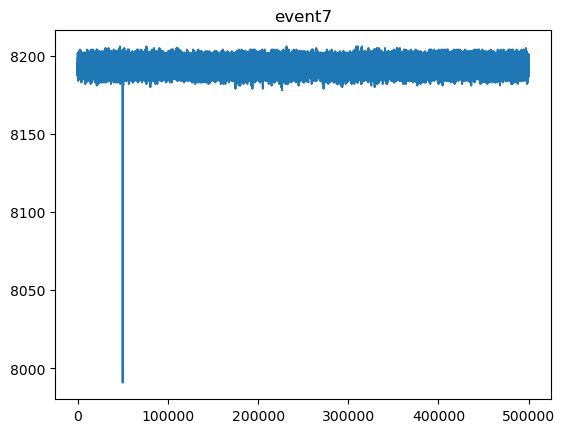

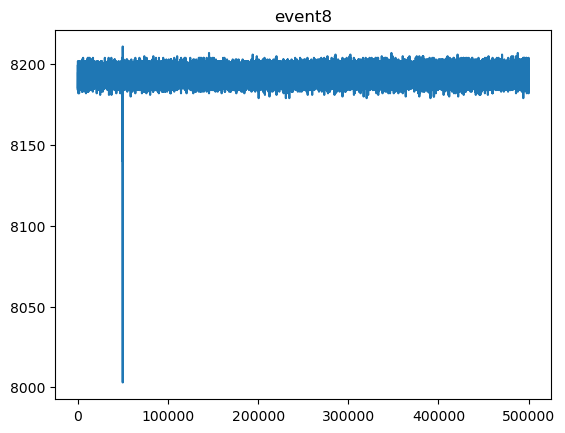

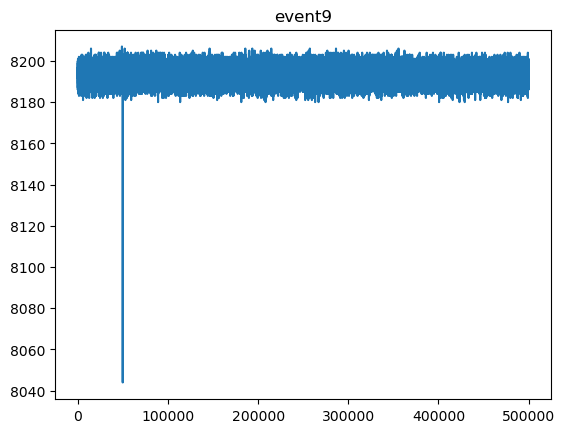

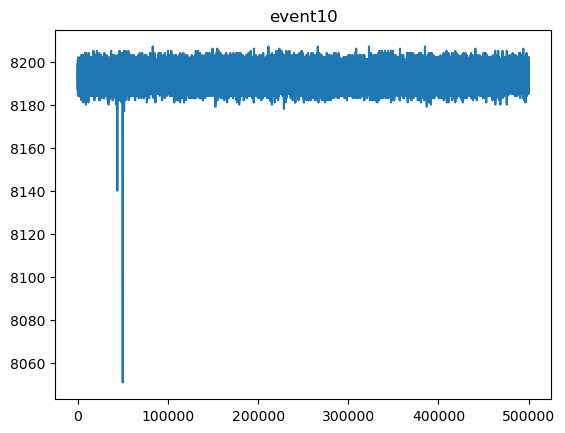

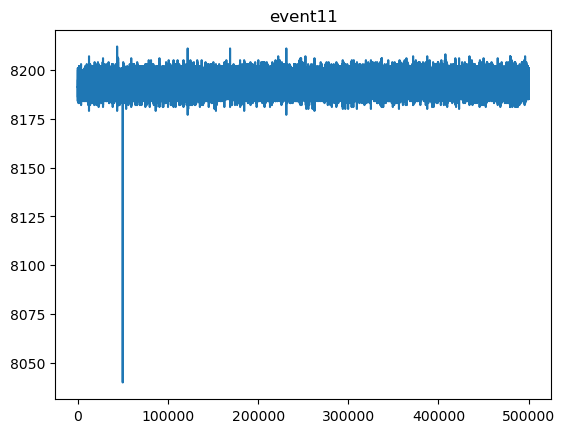

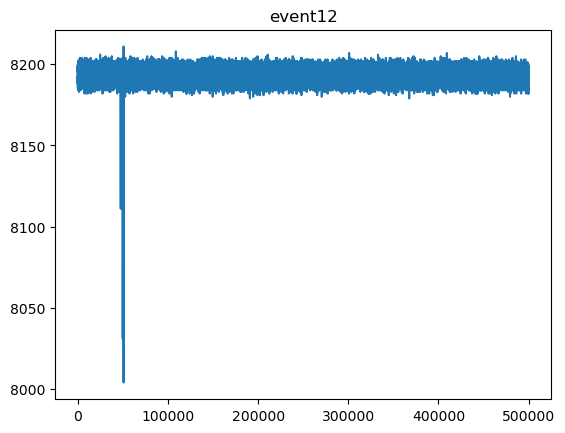

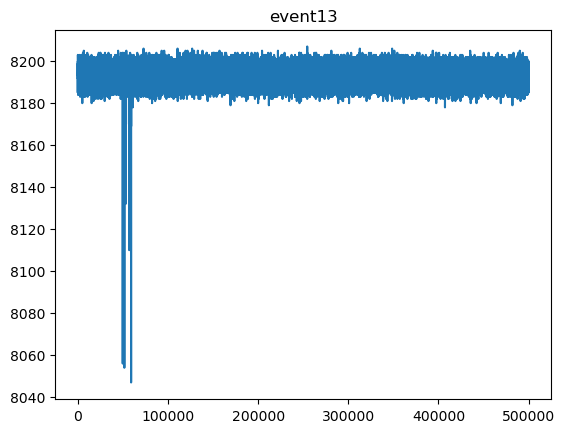

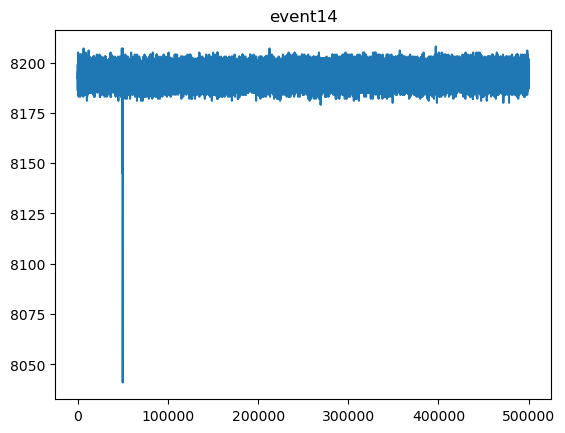

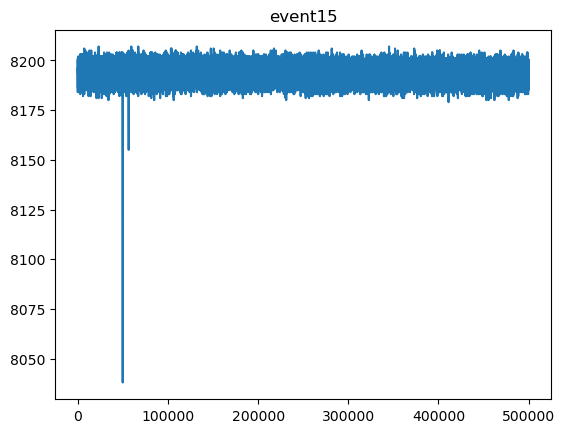

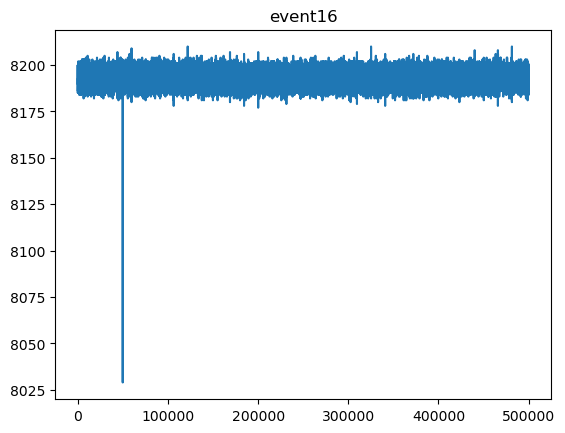

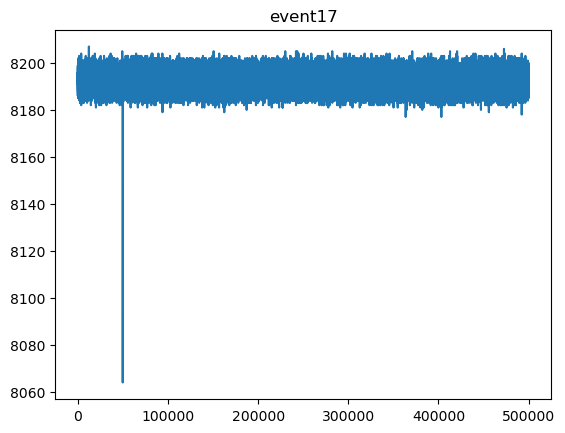

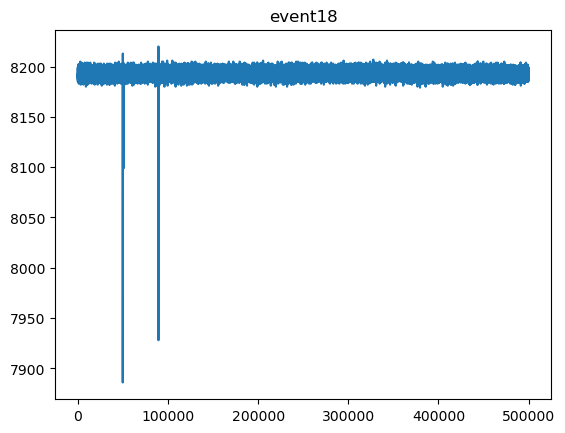

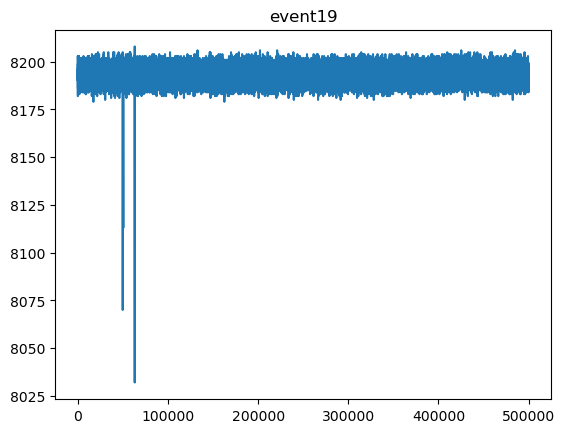

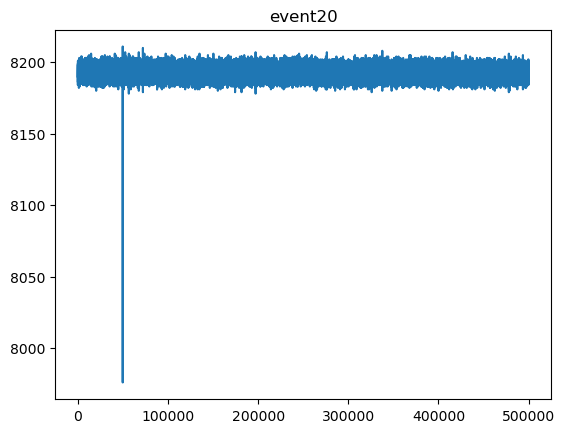

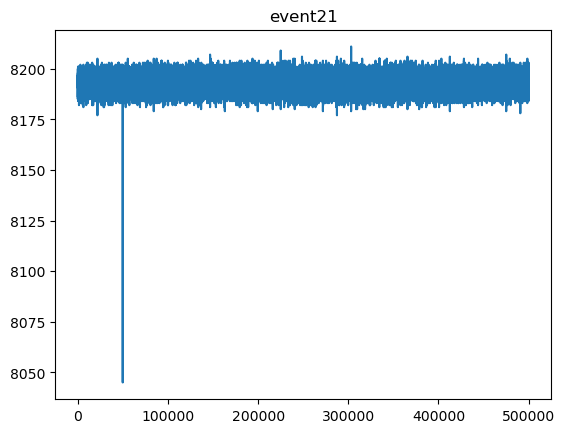

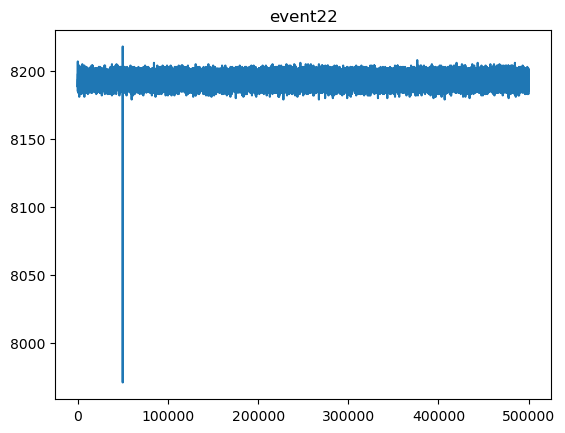

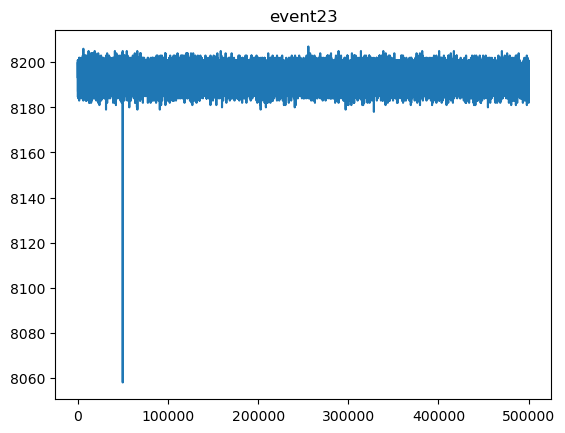

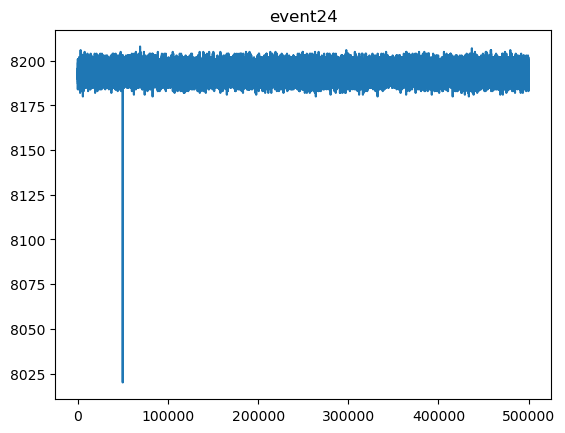

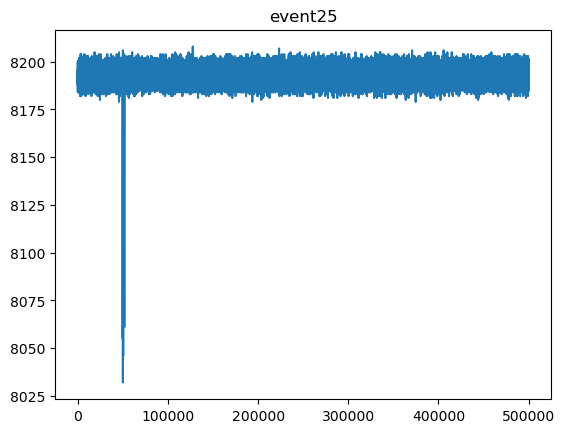

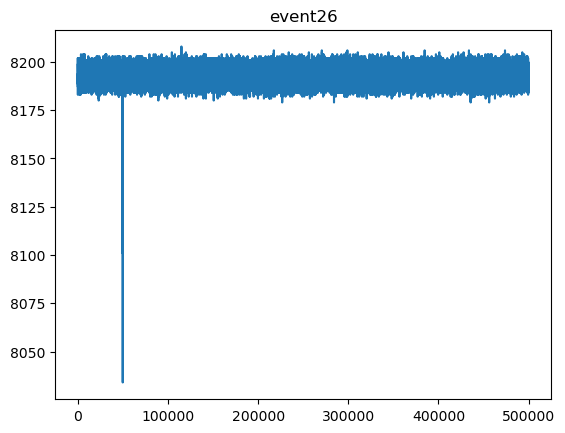

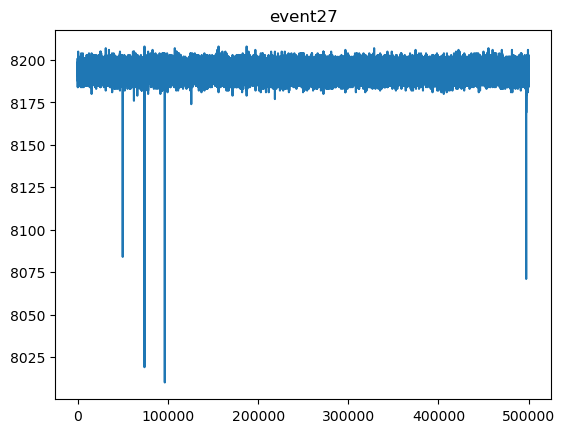

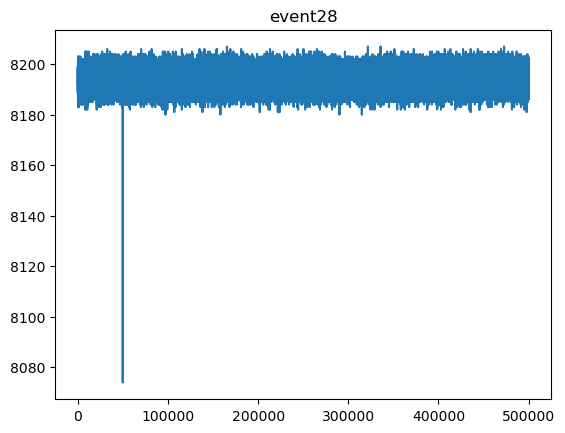

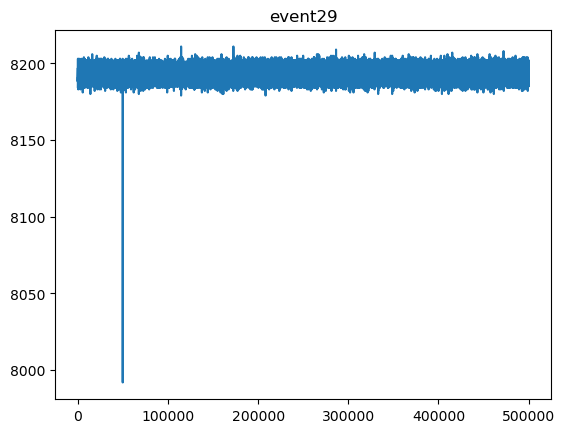

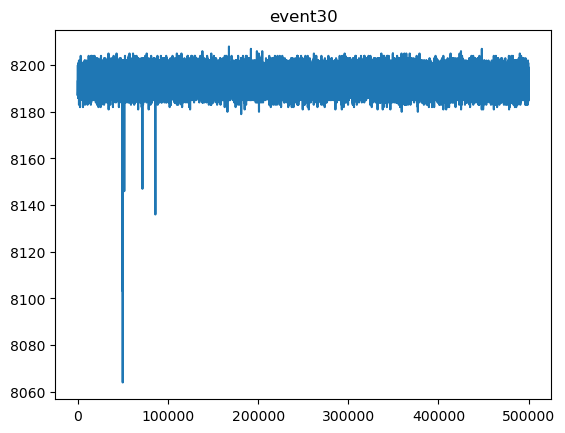

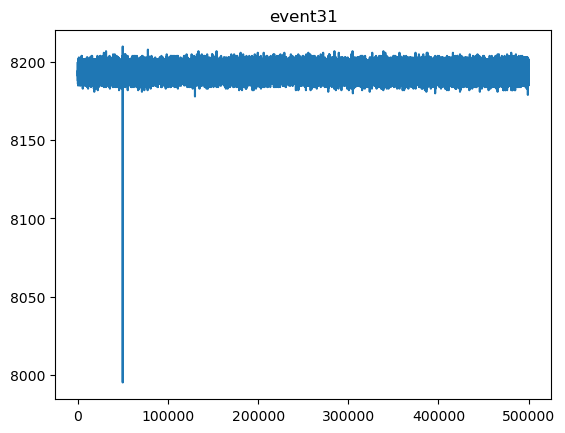

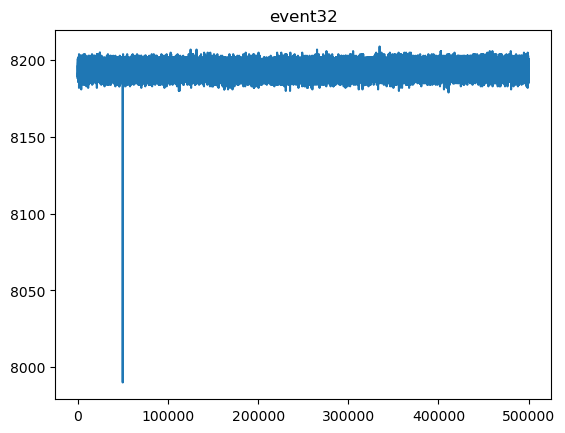

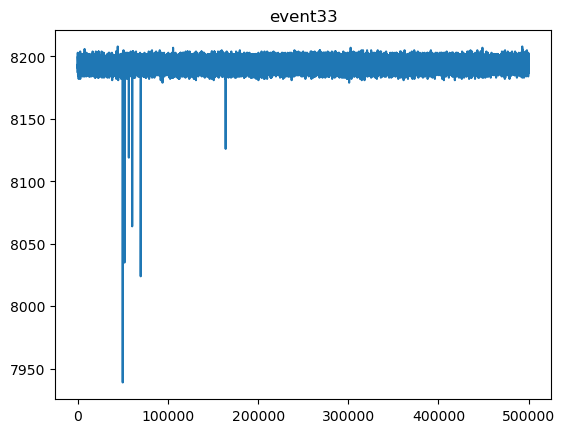

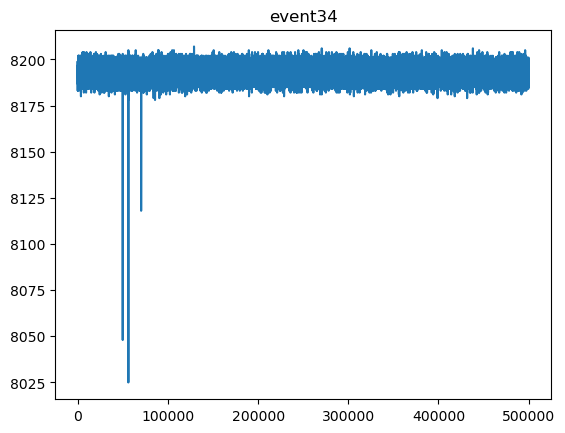

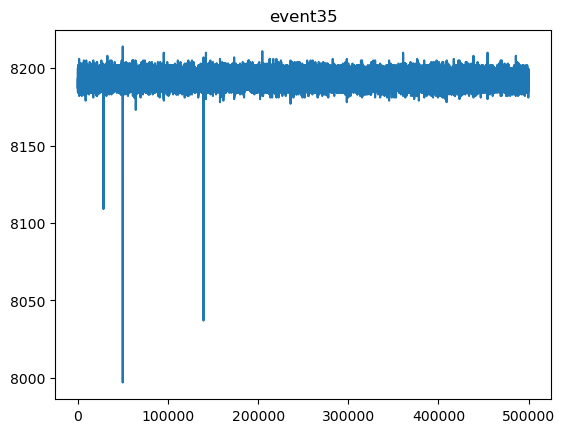

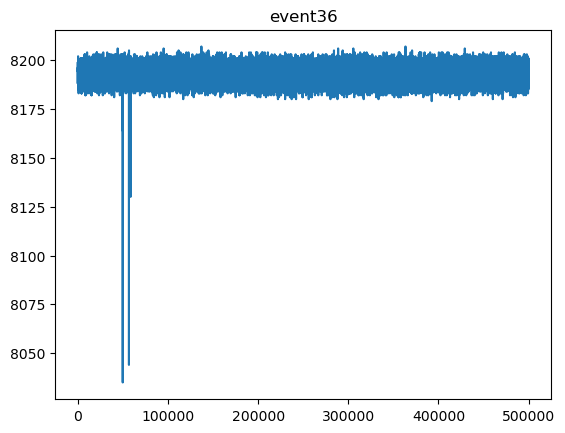

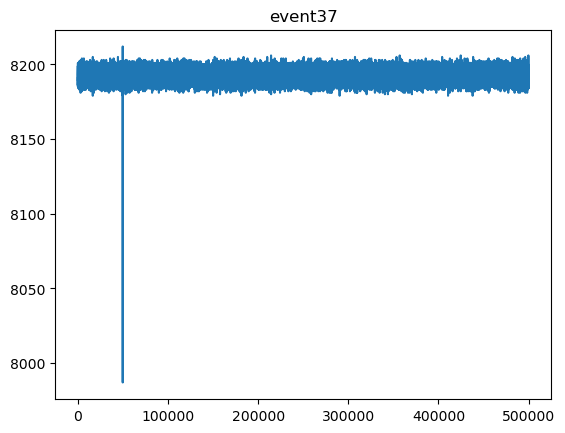

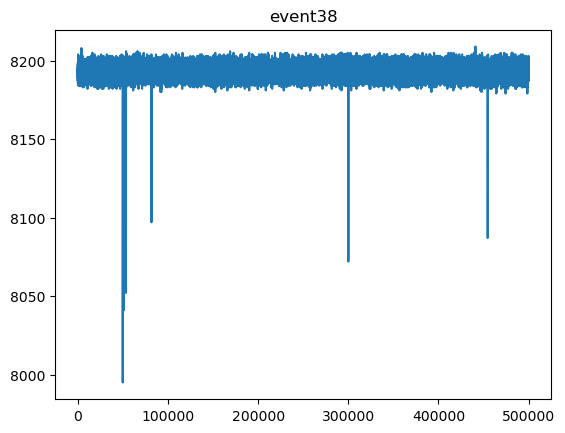

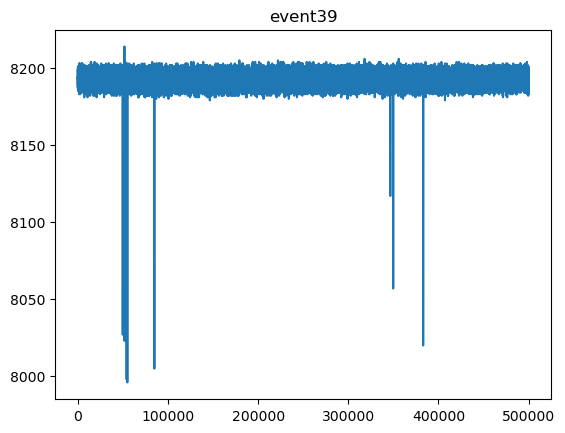

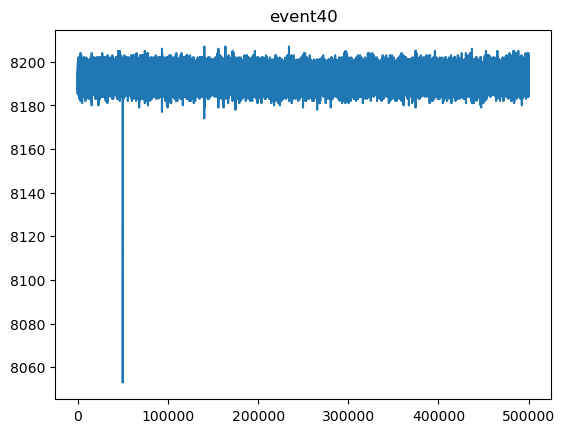

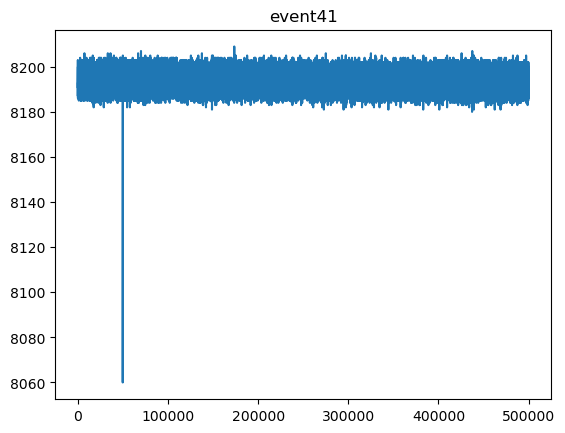

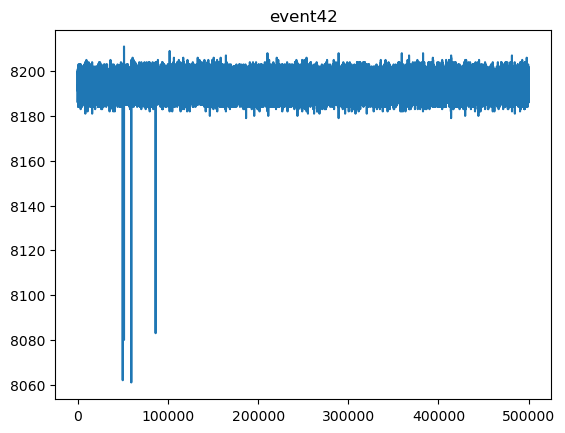

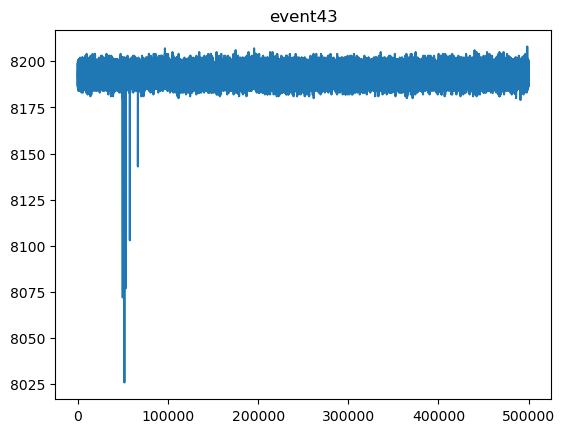

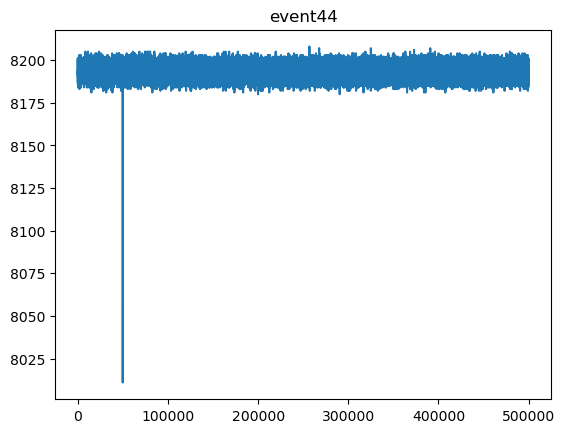

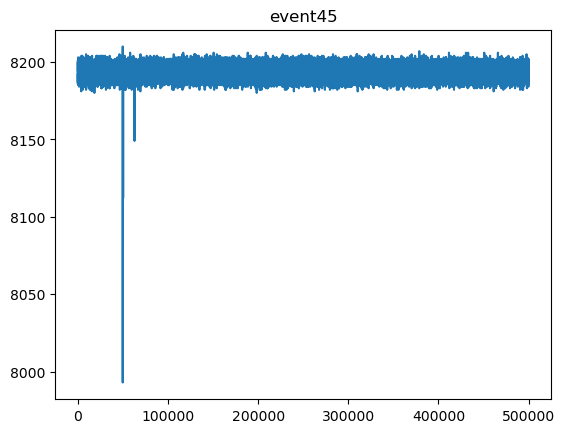

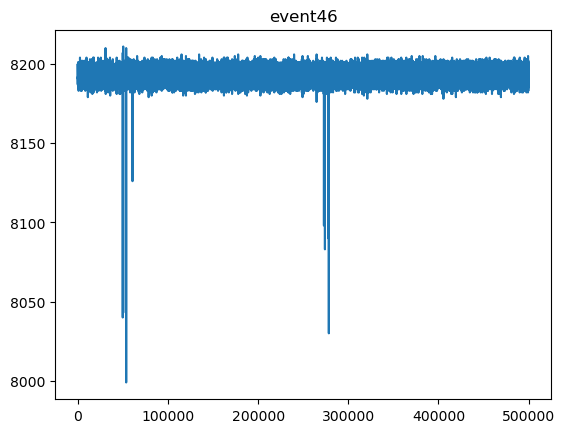

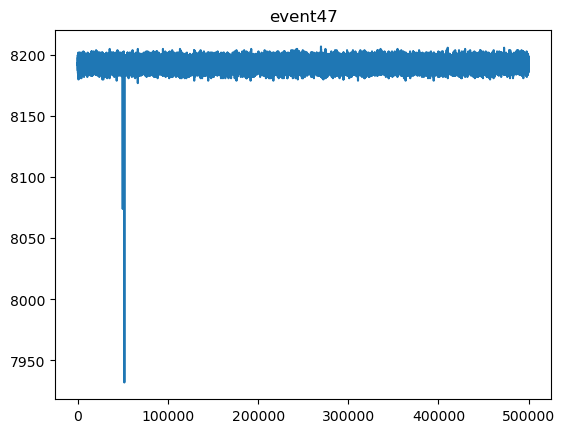

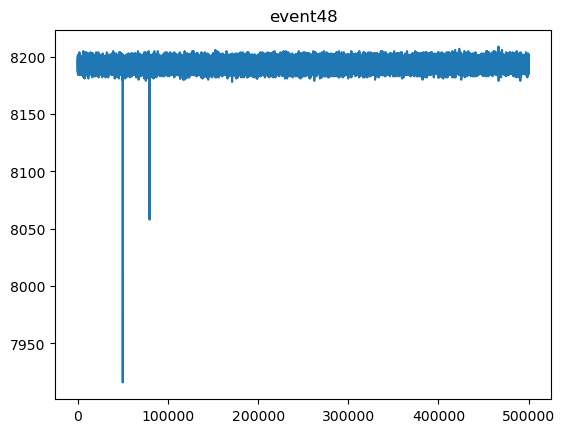

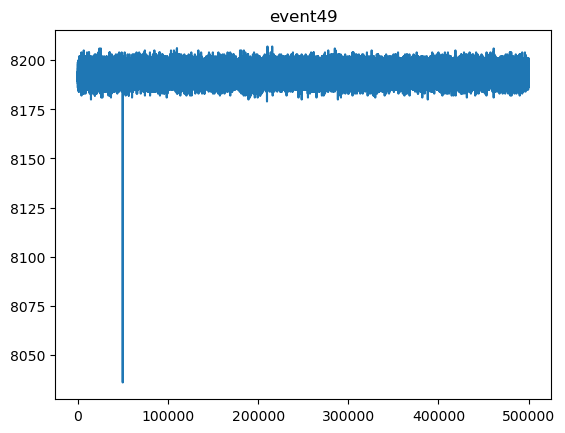

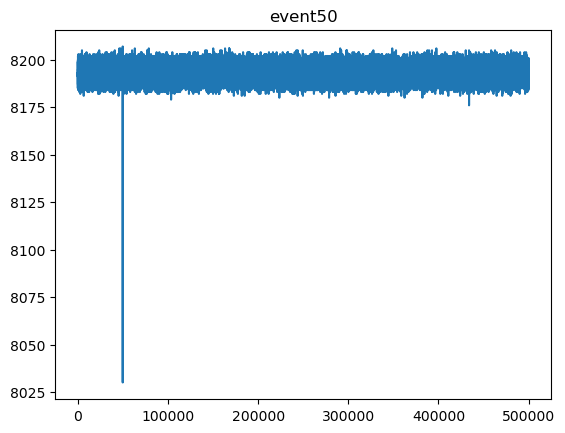

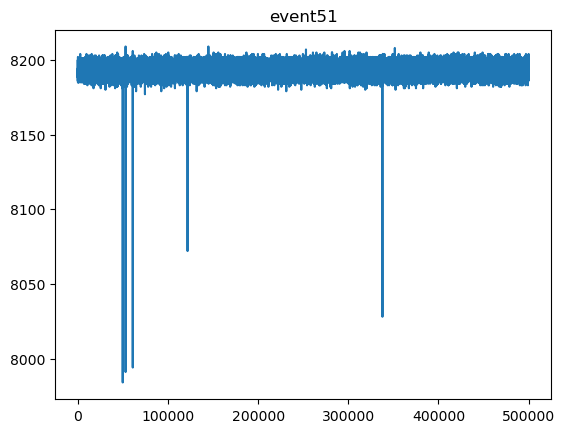

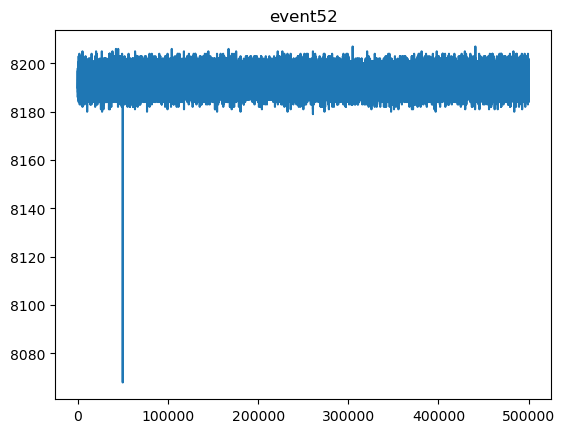

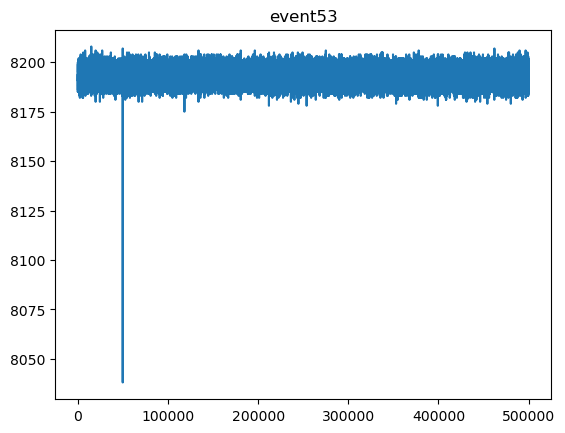

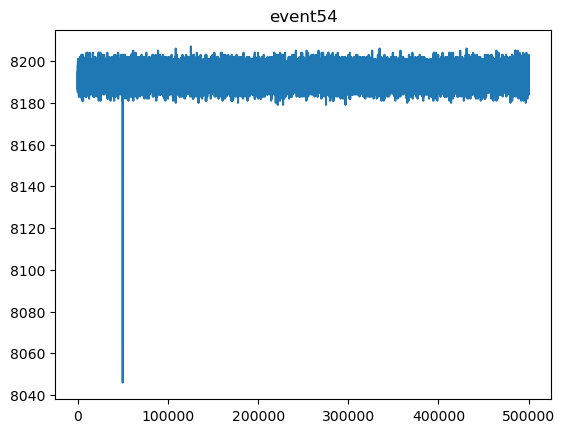

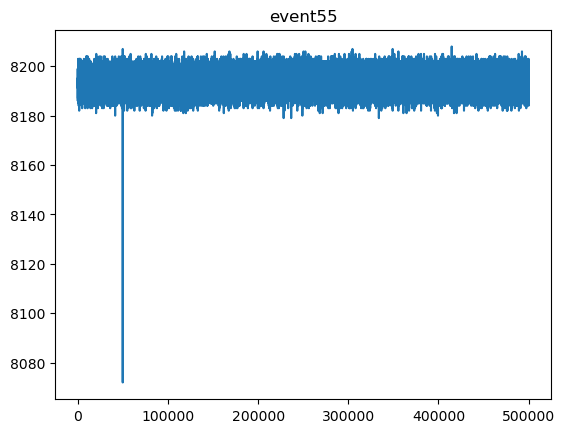

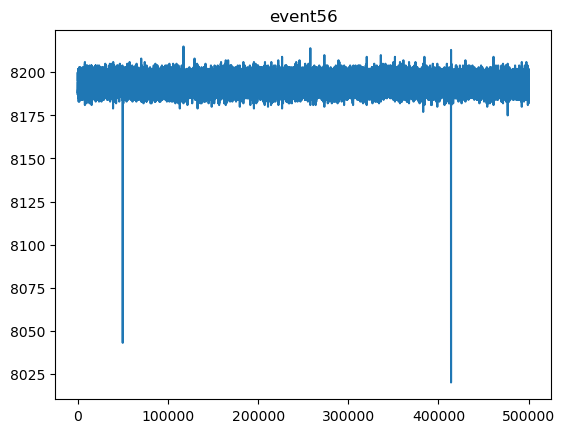

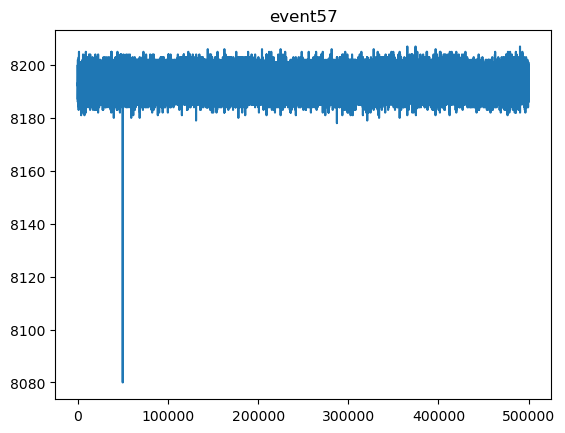

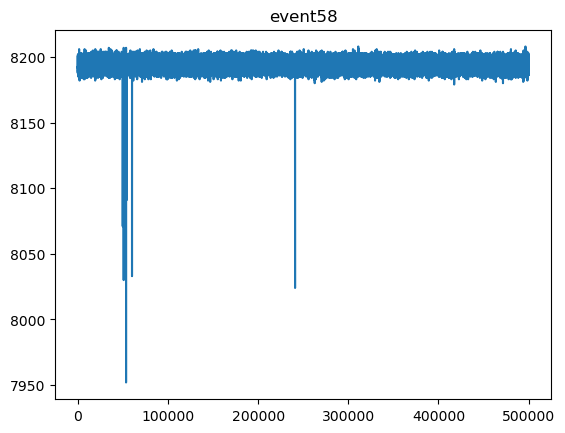

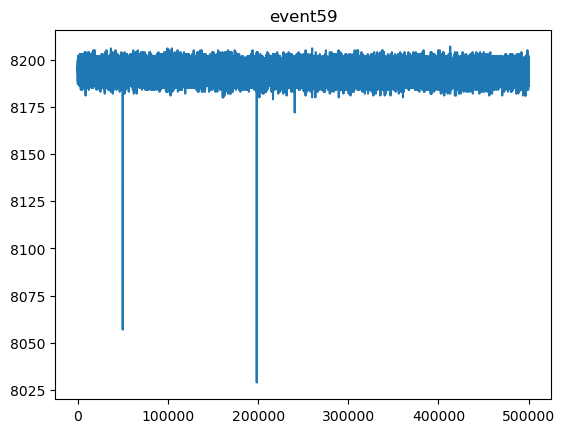

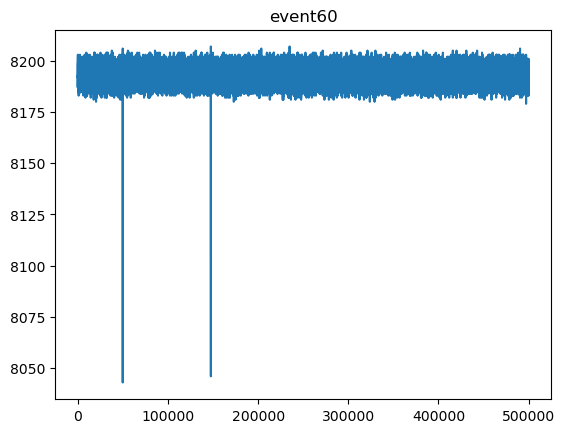

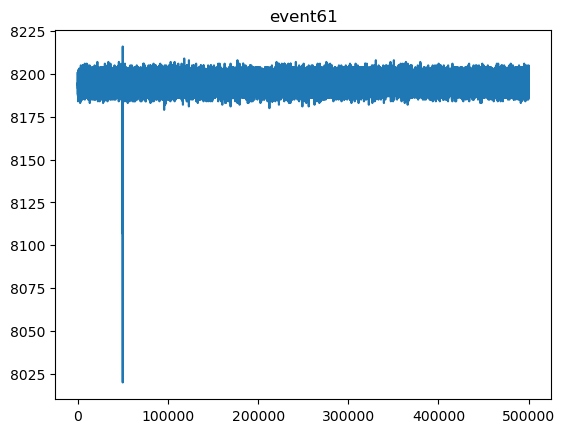

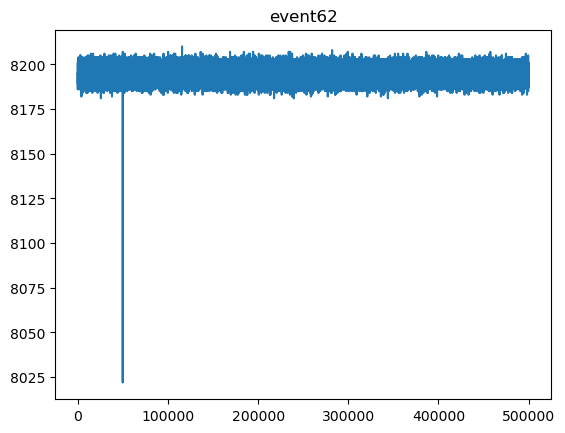

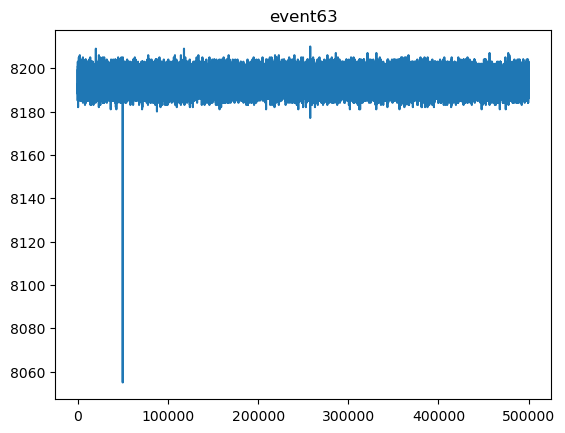

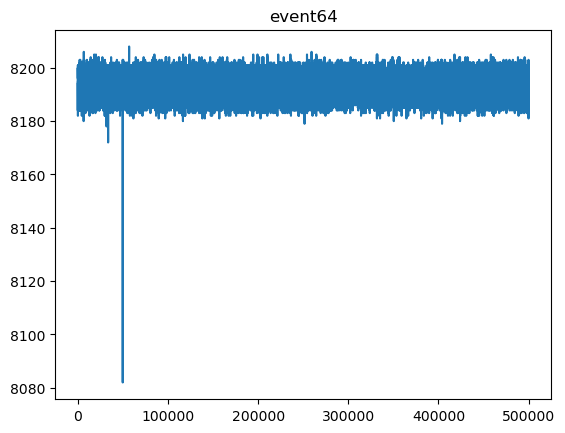

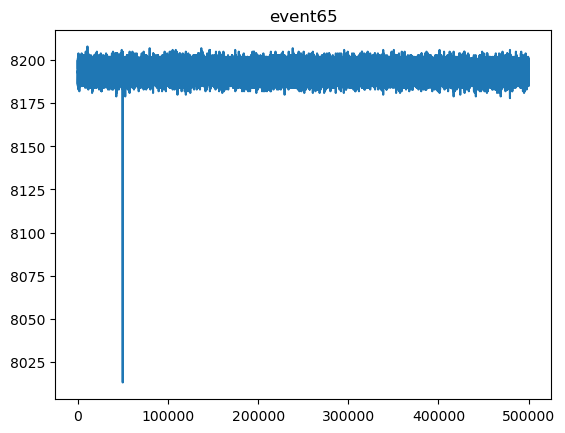

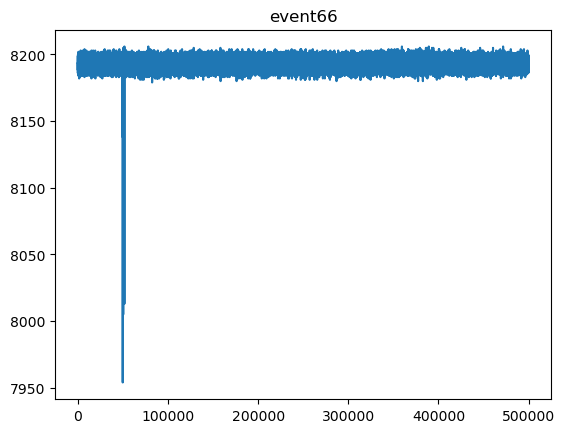

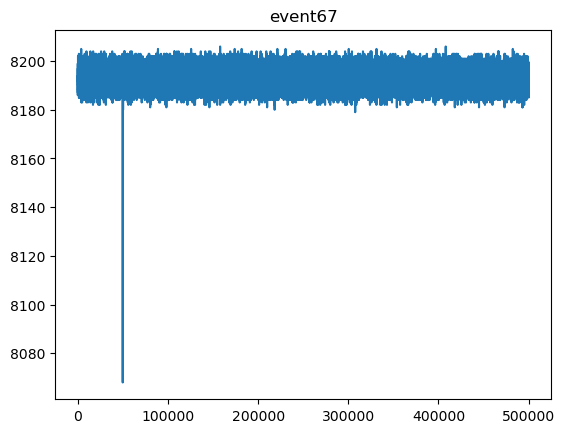

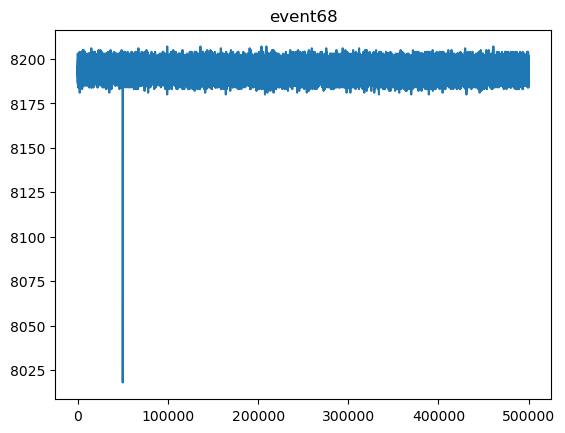

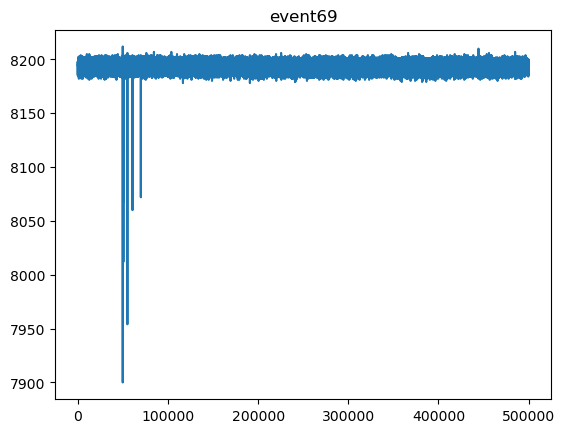

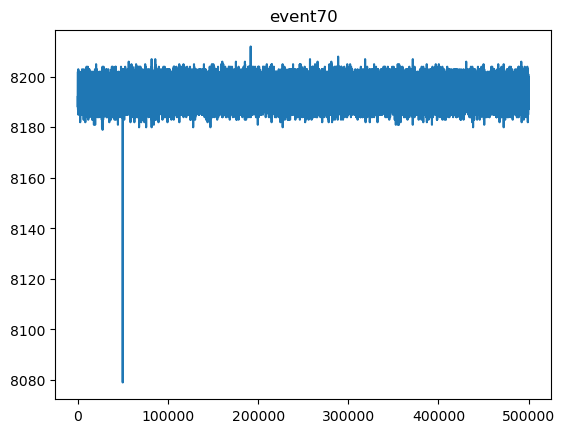

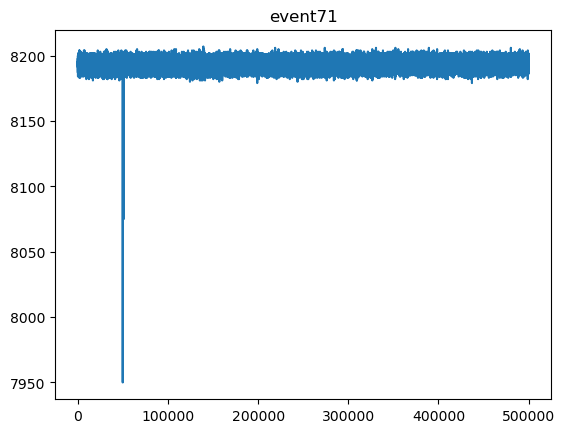

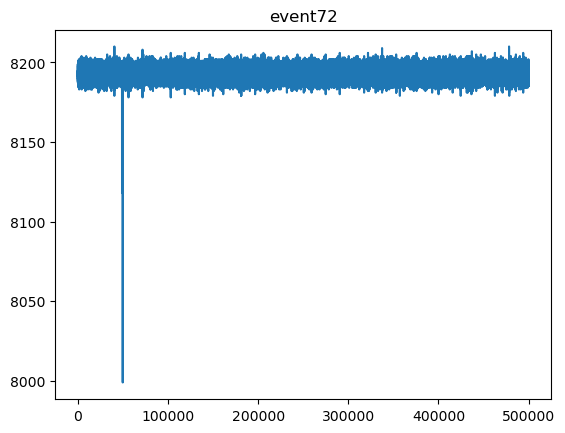

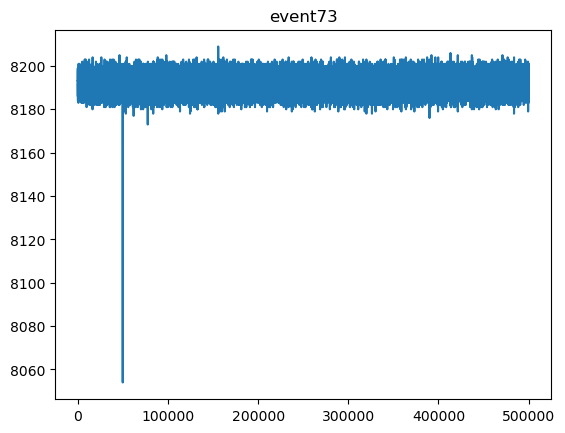

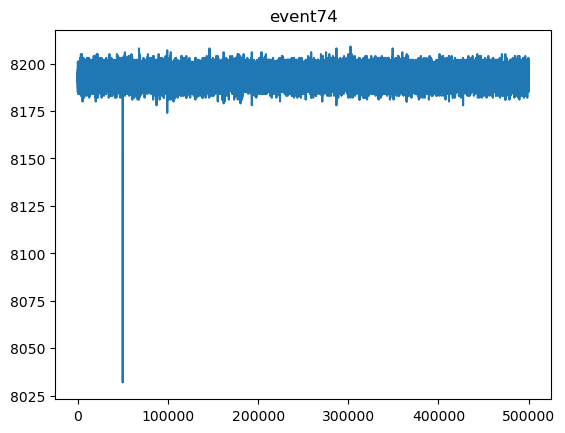

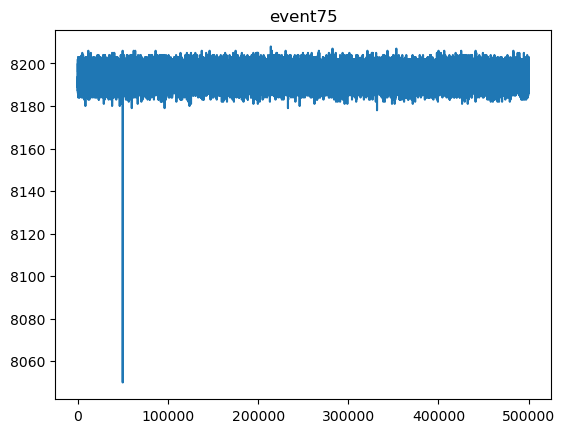

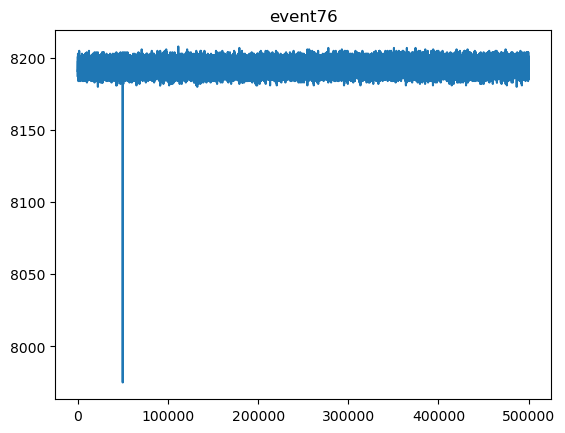

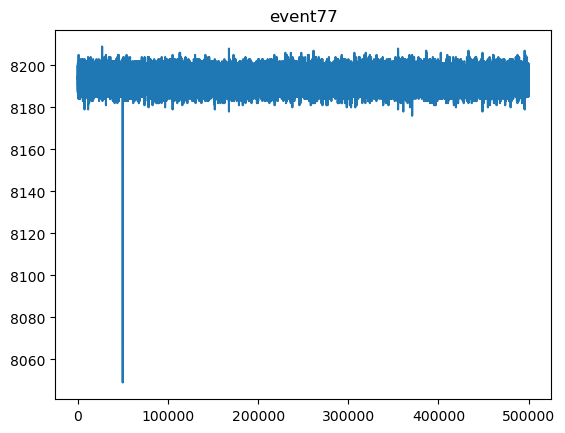

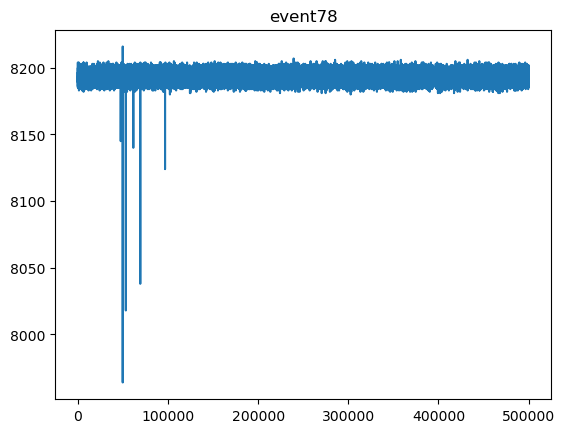

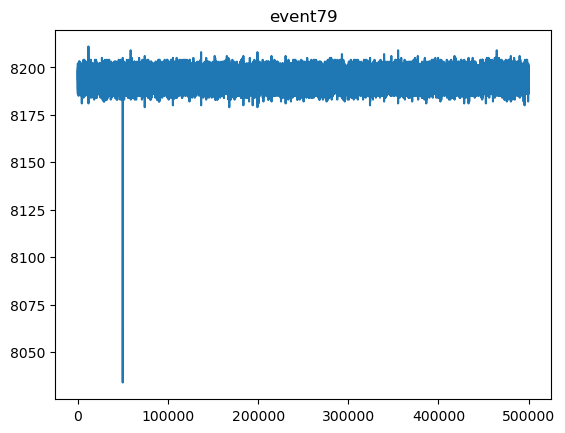

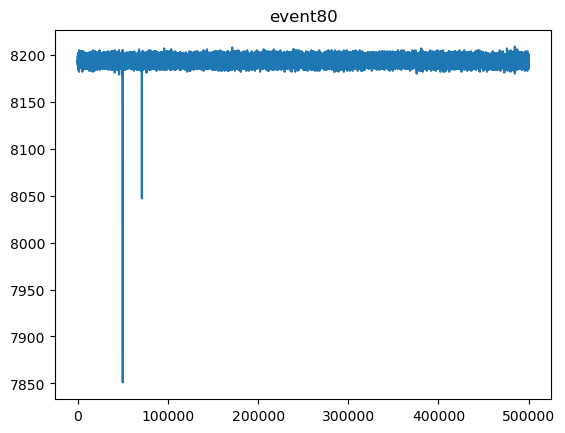

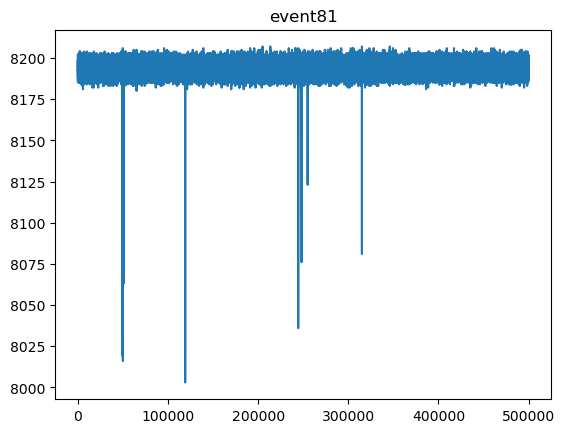

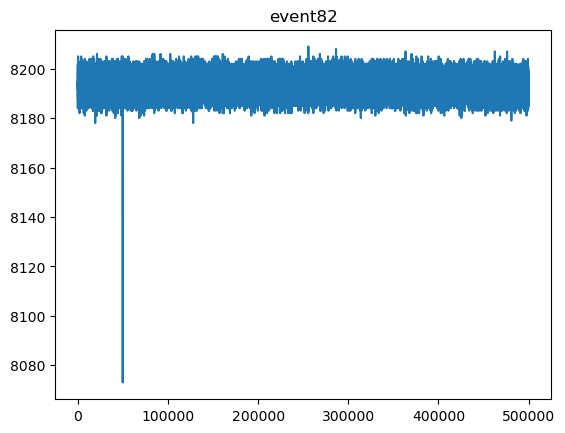

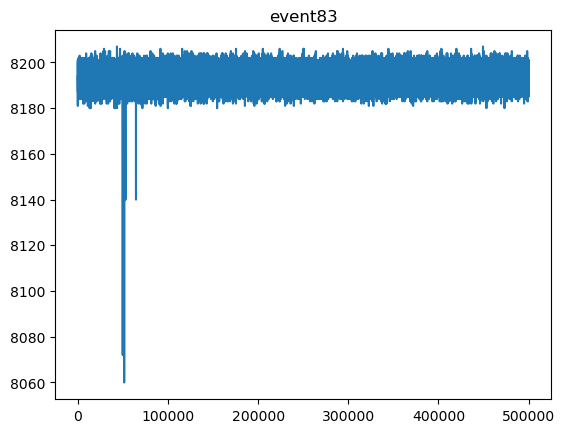

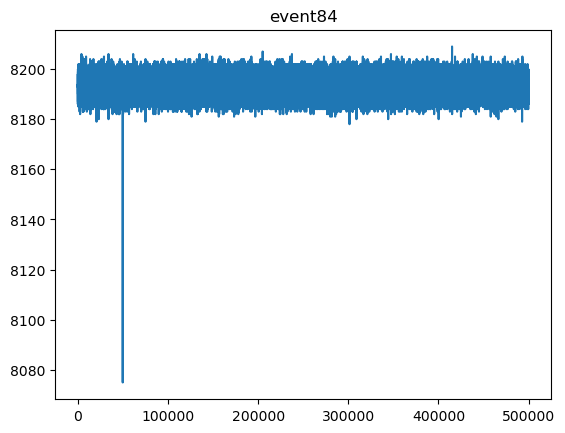

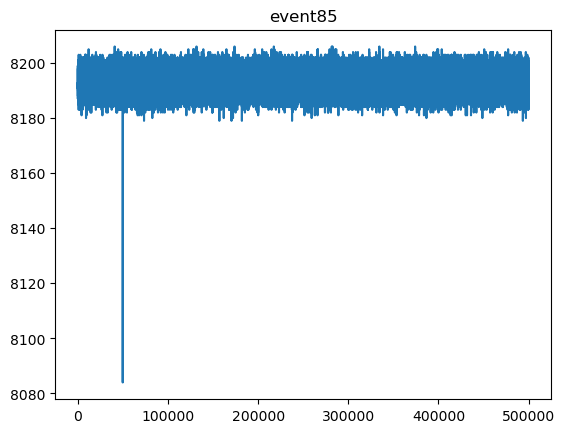

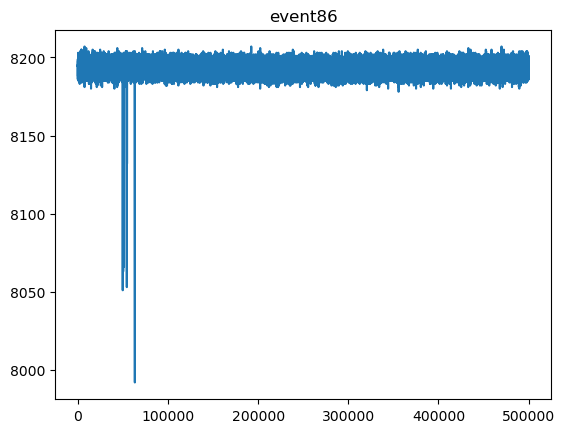

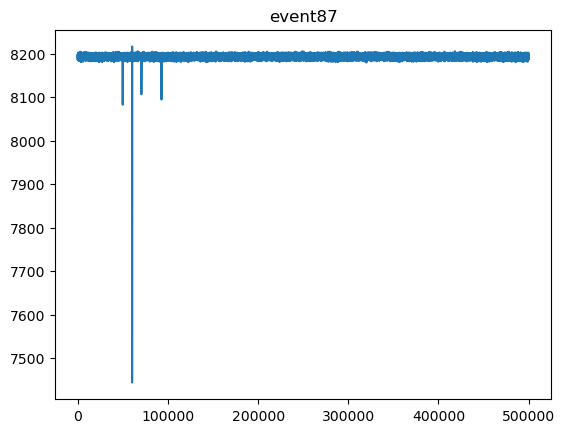

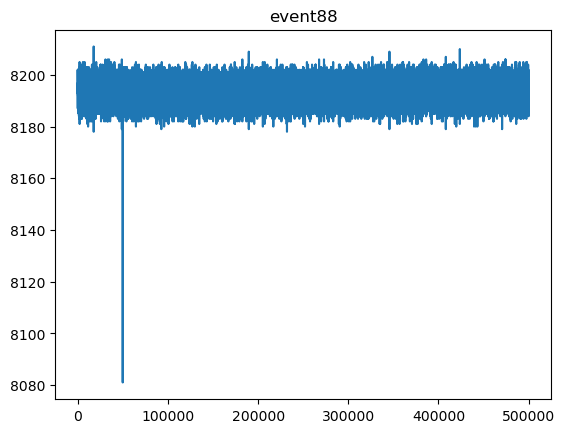

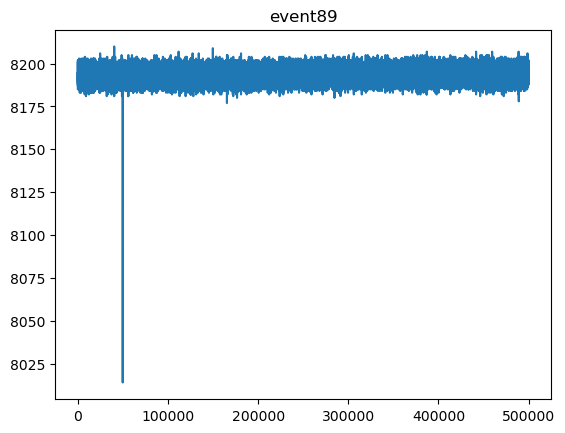

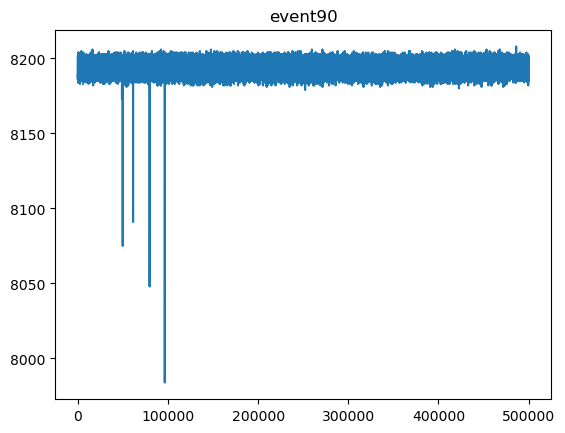

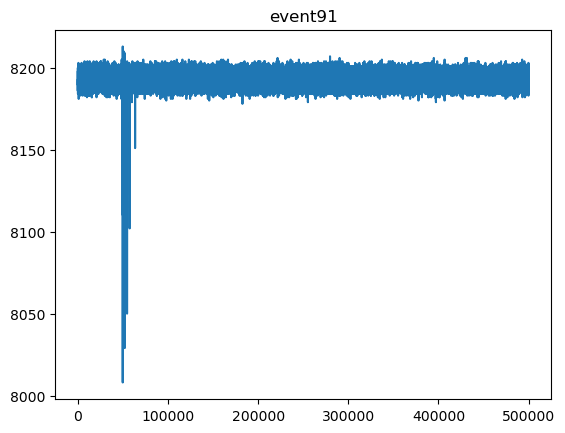

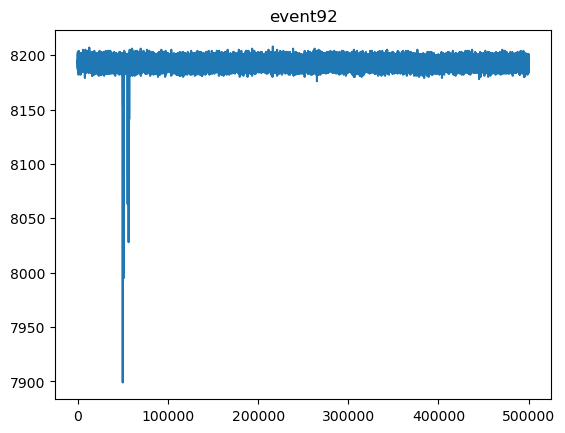

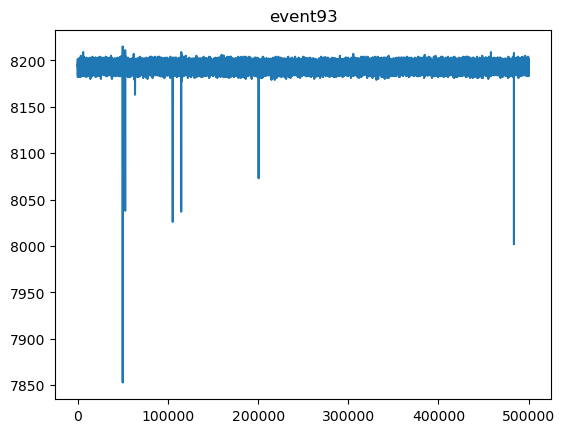

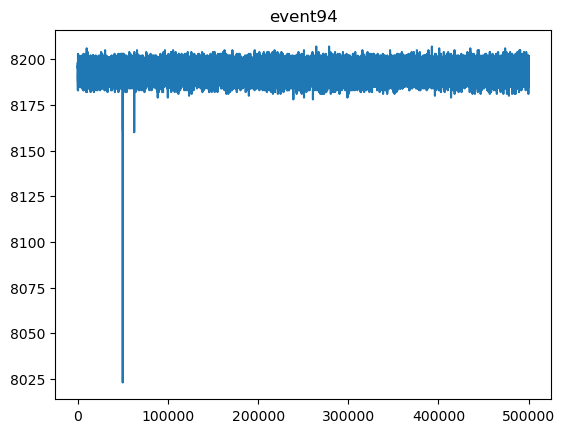

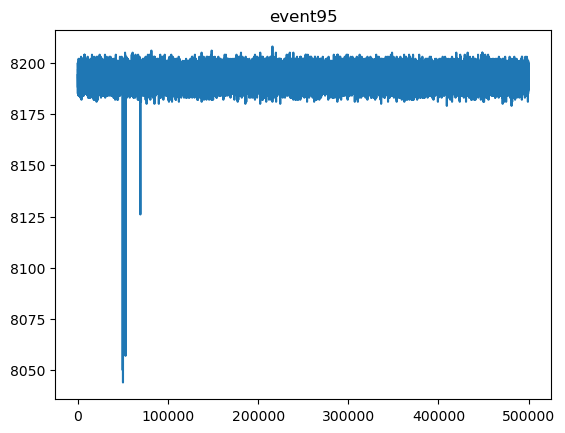

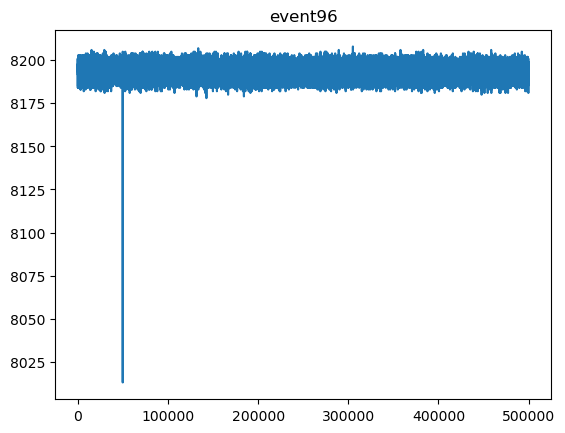

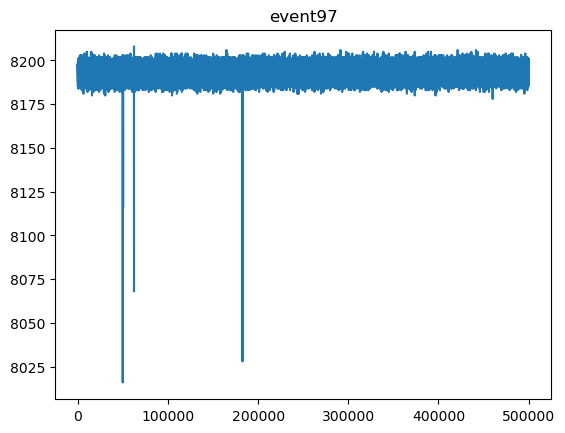

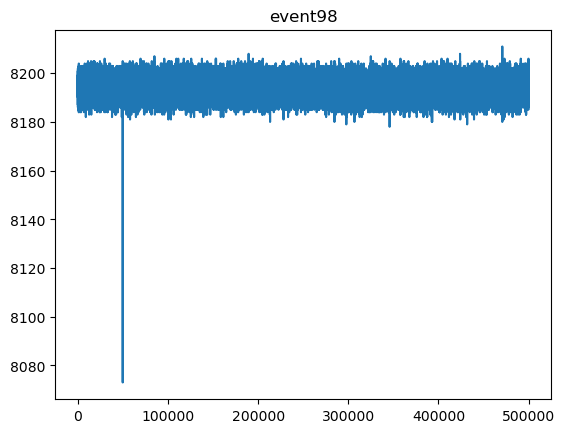

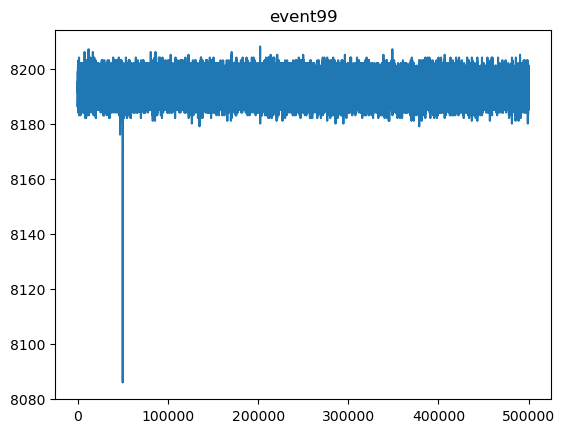

In [5]:
for i in range(round(len(y_vals)/len(y_vals)*100)):

    plt.plot(time, y_vals[i])
    plt.title('event' + str(i))
    plt.show()

#### Lets couple each plot to an ADC value, just to better understand our data.

In [6]:
ADC_val = []
for i in range(len(y_vals)):
    a = y_vals[i]

    # flip to positive
    a = -a
    b = proc.subtract_baseline(a, type = 'median')
    c = proc.integrate_range(b, window = 10, debug=False)

    ADC_val.append(c)


In [7]:
print((np.array(ADC_val) > 250).nonzero())

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   83,   84,   85,   86,   87,   89,   90,
         91,   92,   93,   94,   95,   96,   97,  100,  101,  102,  103,
        104,  105,  106,  107,  108,  109,  110,  112,  113,  114,  115,
        116,  117,  118,  119,  120,  121,  122,  123,  124,  125,  127,
        128,  129,  130,  131,  132,  133,  134,  135,  136,  137,  138,
        139,  140,  141,  143,  144,  145,  146,  148,  149,  150,  151,
        152,  153,  154,  155,  156,  157,  158,  

Min: 180.0      Max: 3942.0


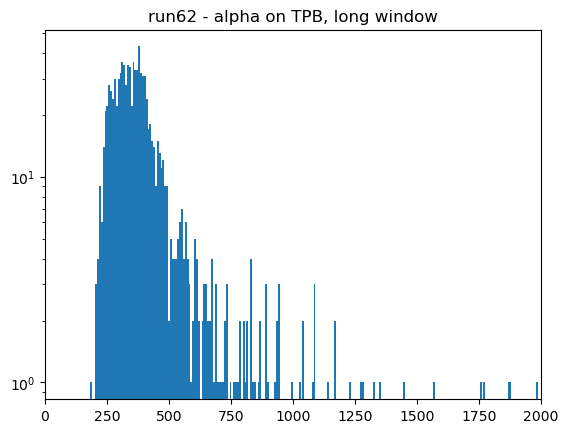

In [9]:
print("Min: {}      Max: {}".format(min(ADC_val), max(ADC_val)))
plt.hist(ADC_val, bins = 500)
plt.yscale('log')
plt.xlim(0,2000)
plt.title('run62 - alpha on TPB, long window')
plt.show()

#### Lets trim some of the fat

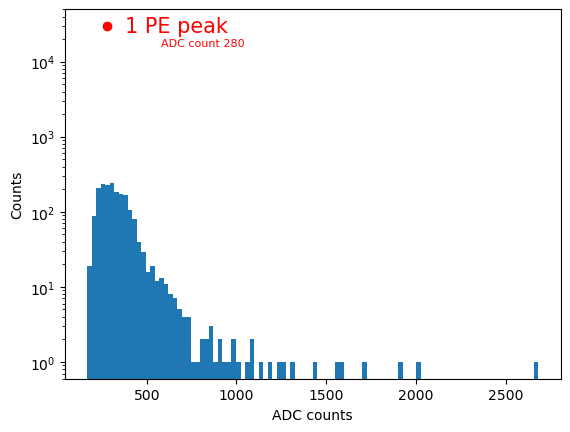

In [33]:
ADC_trimmed = [x for x in ADC_val if x <= 5000]

plt.hist(ADC_trimmed, bins = 100)
plt.plot(280, 30000, 'ro')
plt.text(380, 25000, '1 PE peak', fontsize = 15, color = 'red')
plt.text(580, 16000, 'ADC count 280', fontsize = 8, color = 'red')
plt.ylabel('Counts')
plt.xlabel('ADC counts')
plt.yscale('log')
plt.show()

In [67]:
print(np.argmax(ADC_trimmed))

16577


NameError: name 'ADC_trimmed' is not defined

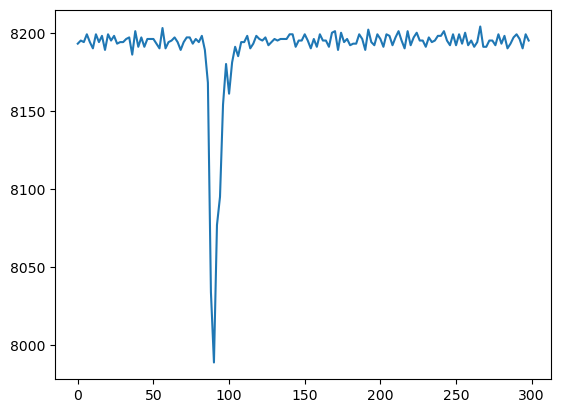

In [12]:
# lets plot the crazy big event

q = 12527

plt.plot(time, y_vals[q])
plt.title('event ' + str(i) + ": ADC - " + str(ADC_trimmed[q]))
plt.show()